# House Price Prediction using Feature Selection
 #### Author: Halit Vural

This work was inspired by support from Clarusway

http://www.clarusway.com 

and the ideas of

the Author of

https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda

<a id='toc'></a>
## Table of Contents

* [Introduction](#intro)
* [Import libraries](#import)
* [Load Data](#load)
* [Explore the most important variables](#explore)



<a id="intro"></a>
# Introduction 
| [toc](#toc)<br>
The work shown here is inspired by Clarusway educators and students. I used the flow of the notebook by Erik Bruin explaining EDA for House Price prediction. This work is to present Clarusway students for a recap of given Machine Learning course. All the code is taken from Clarusway teaching staff and the Internet search. The code without a reference gives a credit to Clarusway tutors. I tried to include the references from Internet searches.


<a id='import'></a>
### Import required libraries
| [toc](#toc)<br>
We will import the libraries needed for our method calls.

In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


<a id='load'></a>
# Load Data
| [toc](#toc)<br>

In [127]:
#ingest from local
df = pd.read_csv('train.csv')

In [128]:
#from google.colab import drive
#drive.mount('/content/gdrive/')

In [129]:
#ingest from Google Drive
#df = pd.read_csv('/content/gdrive/MyDrive/ML-DS/Git-Repo/ML-devcode/Kaggle/Competitions/House Price Prediction/train.csv')

In [130]:
#ingest from Kaggle
#df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [131]:
df.shape

(1460, 81)

# Identify the Structure of the Data
| [toc](#toc)<br>

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We identify that SalePrice is our target variable.

In [133]:
target = 'SalePrice'

In [134]:
df.drop(columns='Id', inplace=True)

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


<a id='explore'></a>
## Exploring the most important variables
| [toc](#toc)<br>

In [136]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

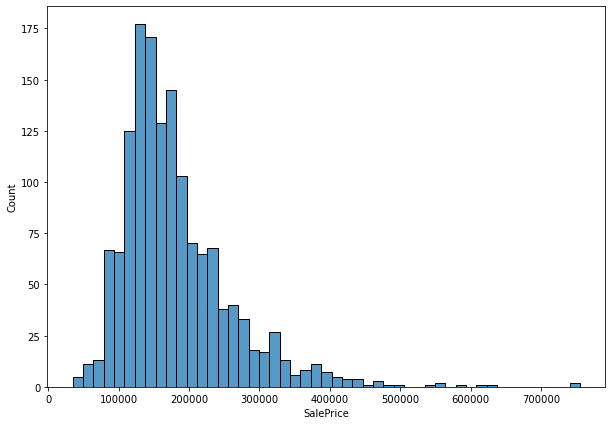

In [137]:
plt.rcParams["figure.figsize"] = (10,7)
sns.histplot(data=df, x=target)

<AxesSubplot:>

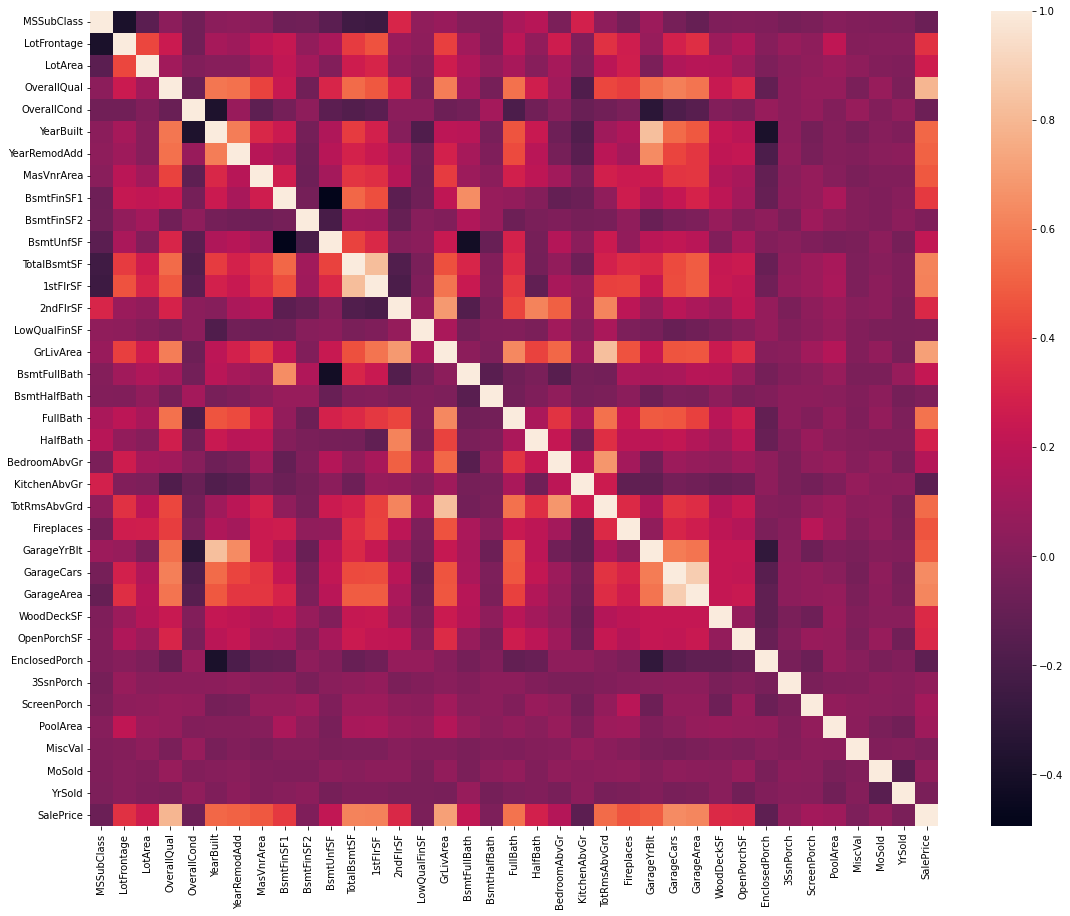

In [138]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr())

<AxesSubplot:>

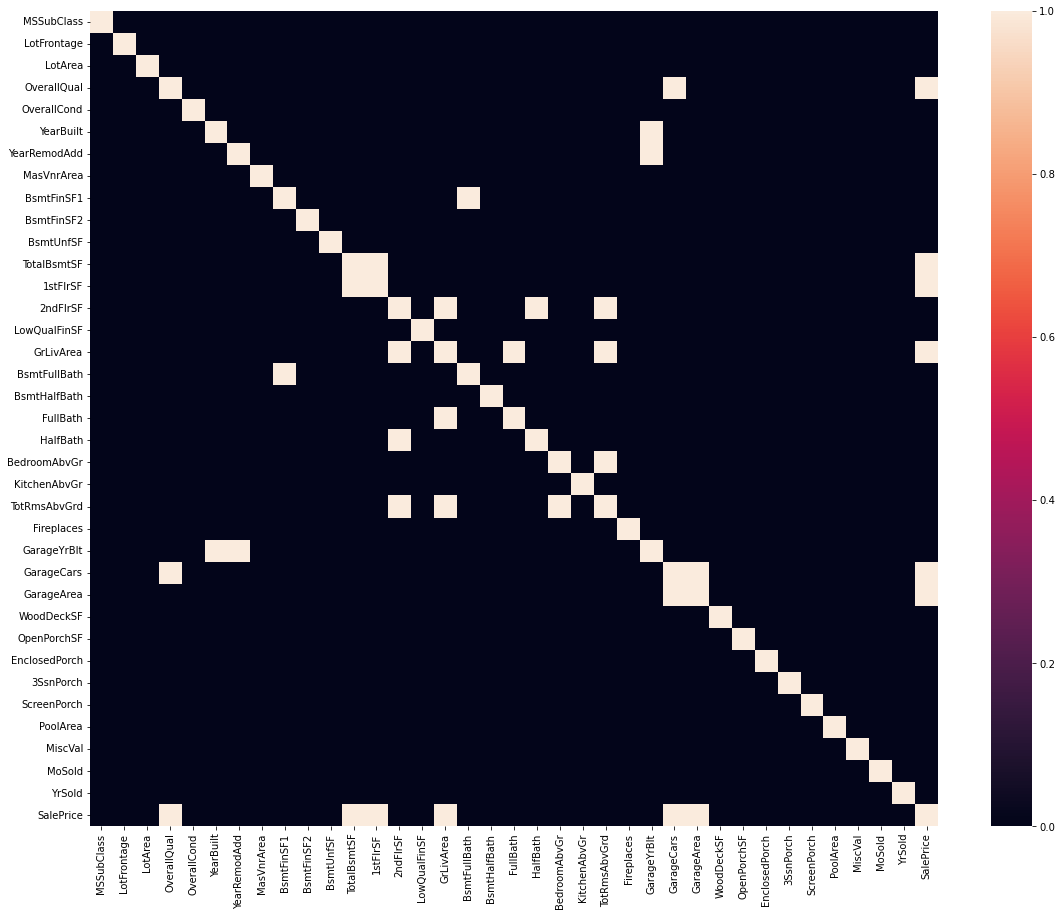

In [139]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.6) #>.7)

In [140]:
def print_corr_list(data, col_Target, prec=0.5):
    print(f'Corr between {col_Target} and :')
    cnt = 0
    for i in data.select_dtypes(['number']).drop(columns = col_Target) :
        c=data[col_Target].corr(data[i])
        if c > prec:
            print(f'{i:<12} : {c:.5}')
            cnt += 1
    print(f"({cnt}) variables listed.")
    print(f"Correlation threshold: {prec}")

In [141]:
print_corr_list(df, target)

Corr between SalePrice and :
OverallQual  : 0.79098
YearBuilt    : 0.5229
YearRemodAdd : 0.5071
TotalBsmtSF  : 0.61358
1stFlrSF     : 0.60585
GrLivArea    : 0.70862
FullBath     : 0.56066
TotRmsAbvGrd : 0.53372
GarageCars   : 0.64041
GarageArea   : 0.62343
(10) variables listed.
Correlation threshold: 0.5


In [142]:
print_corr_list(df, target, 0.62)

Corr between SalePrice and :
OverallQual  : 0.79098
GrLivArea    : 0.70862
GarageCars   : 0.64041
GarageArea   : 0.62343
(4) variables listed.
Correlation threshold: 0.62


In [143]:
df['GarageArea'].corr(df['GarageCars'])

0.8824754142814629

GarageArea and GarageCars are highly correlated (0.89) with each other.

In [144]:
df.select_dtypes(include=np.number).count().count()

37

In [145]:
def corr_columns(data, col_Target, precision=0.5):
   print(f'Correlated Columns with {col_Target}:')
   list = [col_Target]
   for i in data.select_dtypes(['number']).drop(columns = col_Target):
        c=data[col_Target].corr(data[i])
        if c > precision:
           list.append(i) 
   return list

In [146]:
list = corr_columns(df, target, 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 'OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'GarageArea']

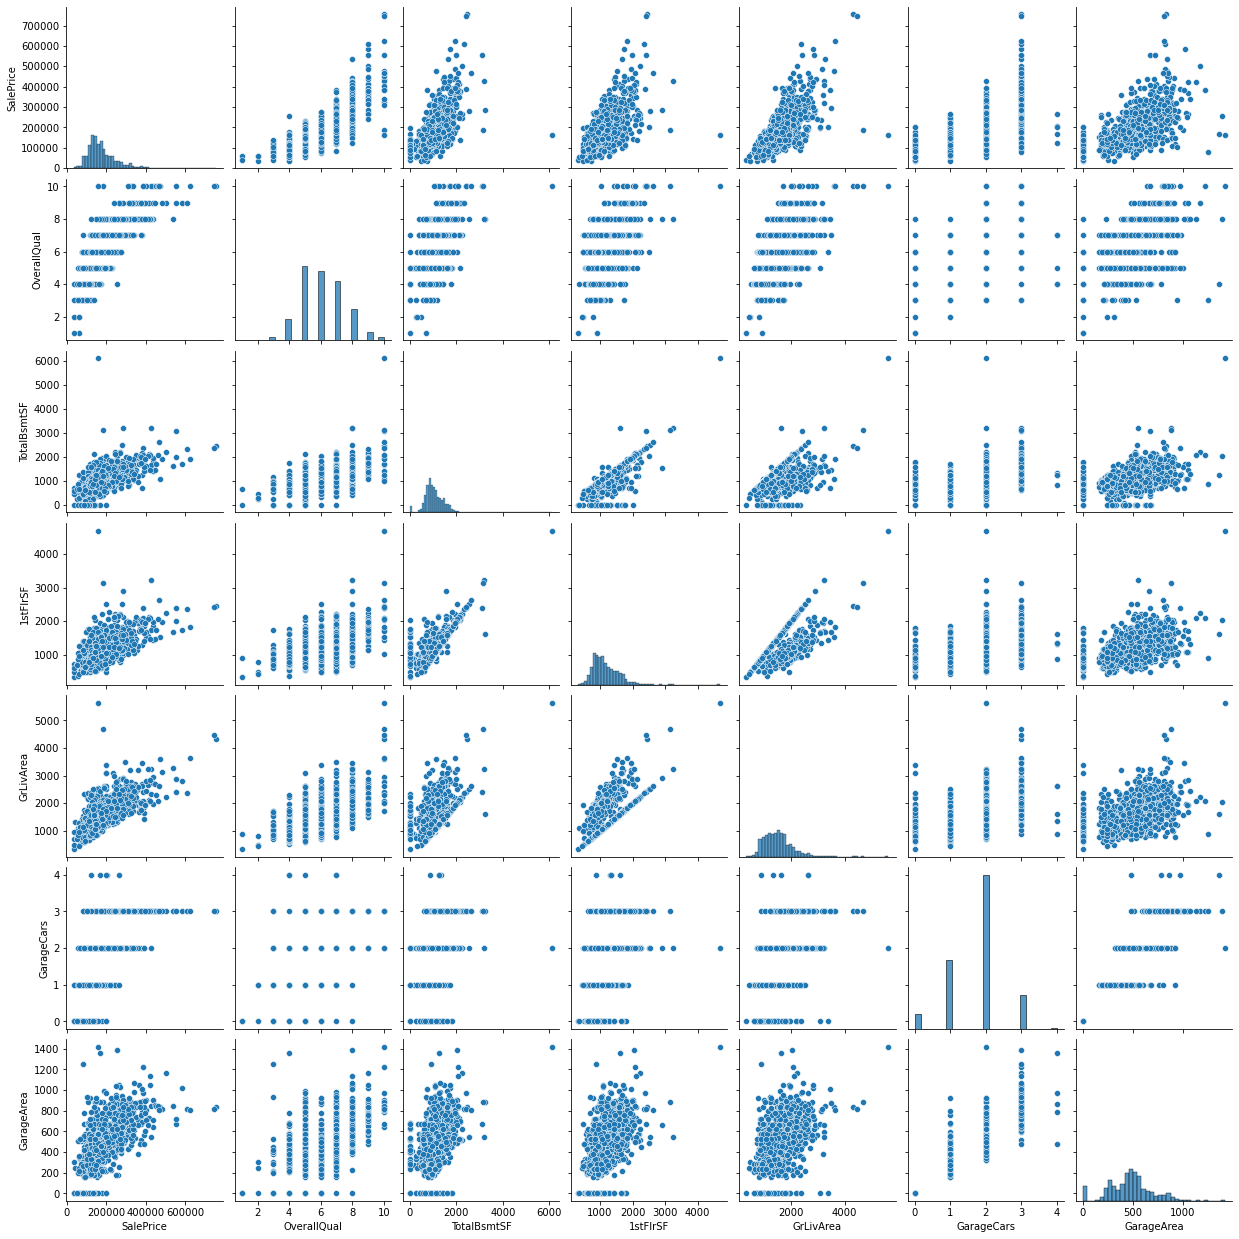

In [147]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[list])

# Data Cleaning

## Missing Values

A guide to deal with missing values

https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

In [148]:
df.isnull().sum().any()

True

In [149]:
df.isnull().sum().sum()

6965

In [150]:
df.shape

(1460, 80)

In [151]:
def count_na(data):
  list ={}
  for i in df.columns:
    cnt = df[i].isnull().sum()
    if cnt > 0:
      list[i] = cnt
  return list

In [152]:
count_na(df)

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [153]:
len(count_na(df))

19

In [154]:
df.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [155]:
#drop the column because it has to many NA
#df.drop("Alley",axis=1,inplace=True)

In [156]:
df.Alley[df.Alley.isna()] = 'None'

In [157]:
count_na(df)

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [158]:
df.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [159]:
df.MiscFeature[df.MiscFeature.isna()] = 'None'


In [160]:
df.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [161]:
df.FireplaceQu[df.FireplaceQu.isna()] = 'None'

In [162]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [163]:
df.PoolQC[df.PoolQC.isna()] = 'None'

In [164]:
count_na(df)

{'LotFrontage': 259,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'Fence': 1179}

In [165]:
df.Fence[df.Fence.isna()] = 'None'

In [166]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

The missing values in LotFrontage can be filled with median. The following article explains why:

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [167]:
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())

In [125]:
count_na(df)

{'Alley': 1365,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1451,
 'Fence': 1176,
 'MiscFeature': 1402}

In [168]:
df.GarageType[df.GarageType.isna()] = 'None'
df.GarageFinish[df.GarageFinish.isna()] = 'None'
df.GarageQual[df.GarageQual.isna()] = 'None'
df.GarageCond[df.GarageCond.isna()] = 'None'

In [169]:
df.GarageYrBlt[df.GarageYrBlt.isna()] = df.YearBuilt[df.GarageYrBlt.isna()]

In [46]:
count_na(df)

{'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1}

In [68]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [69]:
df_ = df[df.MasVnrArea.isna() | df.MasVnrType.isna()]
(df_.MasVnrType, df_.MasVnrArea)

(234     NaN
 529     NaN
 650     NaN
 936     NaN
 973     NaN
 977     NaN
 1243    NaN
 1278    NaN
 Name: MasVnrType, dtype: object,
 234    NaN
 529    NaN
 650    NaN
 936    NaN
 973    NaN
 977    NaN
 1243   NaN
 1278   NaN
 Name: MasVnrArea, dtype: float64)

In [70]:
df.MasVnrArea.median()

0.0

In [170]:
df.MasVnrArea[df.MasVnrType.isna()] = 0.0

In [171]:
df.MasVnrType[df.MasVnrType.isna()] = 'None'

In [172]:
count_na(df)

{'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1}

In [173]:
df.BsmtCond[df.BsmtCond.isna()] = "None"
df.BsmtQual[df.BsmtQual.isna()] = "None"
df.BsmtExposure[df.BsmtExposure.isna()] = "None"
df.BsmtFinType1[df.BsmtFinType1.isna()] = "None"
df.BsmtFinType2[df.BsmtFinType2.isna()] = "None"

In [174]:
count_na(df)

{'Electrical': 1}

In [175]:
df.Electrical[df.Electrical.isna()] = 'SBrkr'

In [176]:
count_na(df)

{}

We have cleared all missing values by imputation.

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

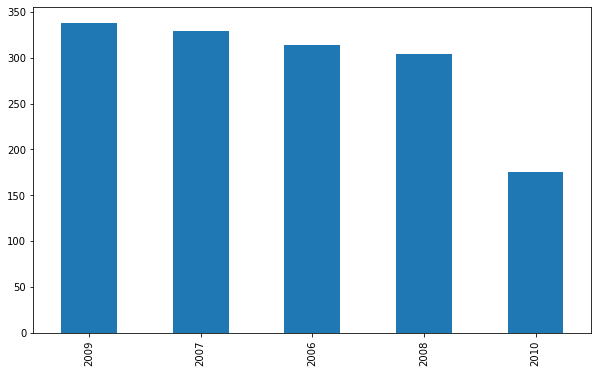

In [178]:
plt.rcParams["figure.figsize"] = (10,6)
df.YrSold.value_counts().plot.bar()

<AxesSubplot:>

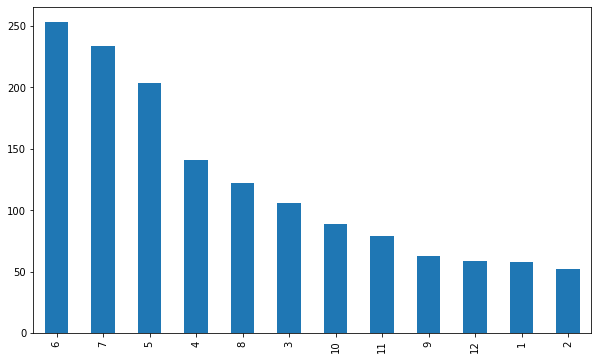

In [179]:
df.MoSold.value_counts().plot.bar()

#### Calculate Median of Prices according to Year/Month

ref: https://www.datasciencemadesimple.com/group-by-mean-in-pandas-dataframe-python-2/ 

<AxesSubplot:xlabel='YrSold'>

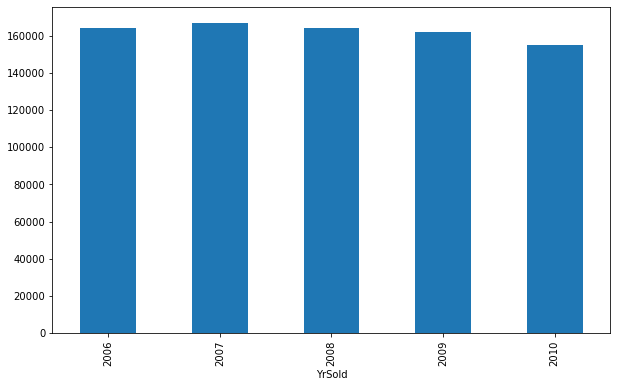

In [180]:
df.groupby(['YrSold'])['SalePrice'].median().plot.bar()

<AxesSubplot:xlabel='MoSold'>

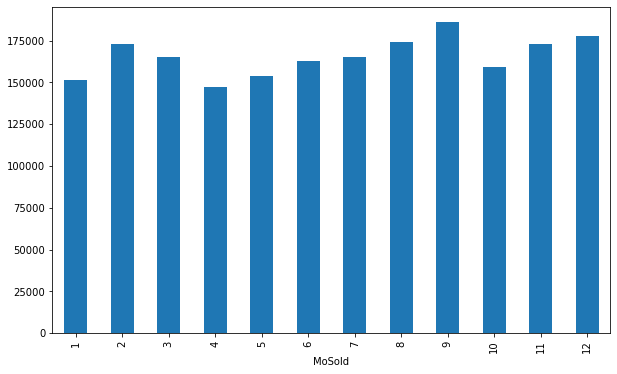

In [181]:
df.groupby(['MoSold'])['SalePrice'].median().plot.bar()

Understanding Bar plots 

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

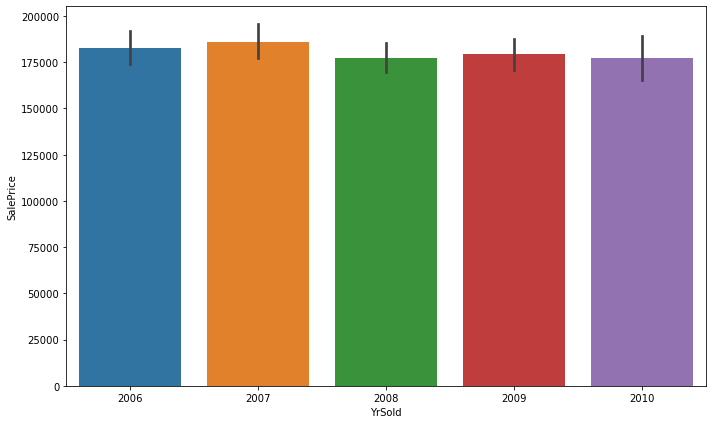

In [182]:
plt.rcParams["figure.figsize"] = (10,6)
sns.barplot(x = df['YrSold'], y = df['SalePrice'], data = df.groupby(['MoSold'])['SalePrice'].median())
#plt.xticks(rotation = 90)
plt.tight_layout()

## Refactoring the features

We will convert year and month data into string.

ref1: https://datatofish.com/integers-to-strings-dataframe/

ref2: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [183]:
df['YrSold'] = df['YrSold'].apply(str)
df['MoSold'] = df['MoSold'].apply(str)

Similarly, some other numeric variables should be converted to string. They are:
* OverallCond 1-10
* OverallQual 1-10
* YearBuilt
* YearRemodAdd
* GarageYrBlt



In [184]:
df.OverallCond = df.OverallCond.apply(str)
df.OverallQual = df.OverallQual.apply(str)
df.YearBuilt = df.YearBuilt.apply(str)
df.YearRemodAdd = df.YearRemodAdd.apply(str)
df.GarageYrBlt = df.GarageYrBlt.apply(str)

MSSubClass includes the numbers, but they are labels. We need to change them into labels.

In [185]:
df.MSSubClass = df.MSSubClass.replace({
                20 : '1STORY 1946+',
                30 : '1STORY 1945-',
                40 : '1STORY FIN ATTIC',
                45 : '1+STORY UNF',
                50 : '1+STORY FIN',
                60 : '2STORY 1946+',
                70 : '2STORY 1945-',
                75 : '2+STORY',
                80 : 'SPL OR MULTI',
                85 : 'SPL FOYER',
                90 : 'DUPL ALL',
                20 : '1STORY PUD 1946+',
                50 : '1+STORY PUD',
                60 : '2STORY PUD 1946+',
                80 : 'PUD MULTI',
                90 : '2FAMILY CONV'
            })
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2STORY PUD 1946+,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,1STORY PUD 1946+,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,2STORY PUD 1946+,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,2STORY 1945-,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,2STORY PUD 1946+,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [187]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).count().count()

29

In [188]:
df.select_dtypes(include='object').count().count()

51

## Defining Important Variables

After cleaning the data, we will check correlation again.

### Correlations

In [189]:
print_corr_list(df, target)

Corr between SalePrice and :
TotalBsmtSF  : 0.61358
1stFlrSF     : 0.60585
GrLivArea    : 0.70862
FullBath     : 0.56066
TotRmsAbvGrd : 0.53372
GarageCars   : 0.64041
GarageArea   : 0.62343
(7) variables listed.
Correlation threshold: 0.5


Since this list includes only numeric variables, categorical variables are not shown as correlated. But we know that some categorical variables can correlate with the price of a house.

### Feature Engineering

We can sum up some variables into one to increase the correlation with the price such as total living area of the house.

#### Total number of bathrooms

In [190]:
df['TotBathrooms'] = df.FullBath + (df.HalfBath * 0.5) + df.BsmtFullBath + (df.BsmtHalfBath * 0.5)

#### House age, Remodeled, isNew

In [191]:
df["Age"] = df.YrSold.astype(int) - df.YearRemodAdd.astype(int)

In [192]:
df.Age.corr(df.SalePrice)

-0.5090787380156294

In [193]:
#sign = "positive" if num >=0 else "negative"
#df['Remodeled'] = "Yes" if df.YearBuilt<df.YearRemodAdd else "No"

#### Total Square Feet

In [194]:
df['TotalArea'] = df.GrLivArea + df.TotalBsmtSF

In [195]:
df.TotalArea.corr(df.SalePrice)

0.7789588289942262

## Drop correlated variables

<AxesSubplot:>

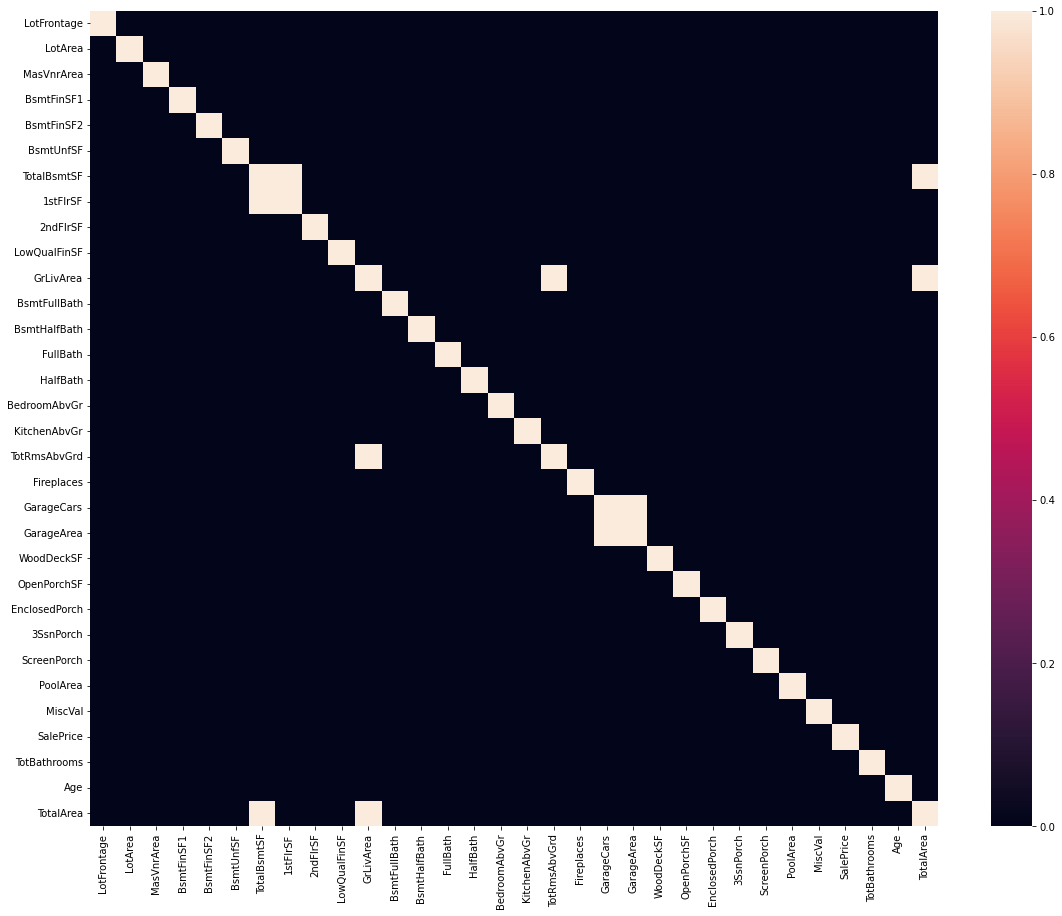

In [196]:
plt.rcParams["figure.figsize"] = (19,15)
sns.heatmap(df.corr()>0.8)

We will drop GarageArea (0.62) because it is less correlated with the price.

In [197]:
df.drop(columns=['GarageArea', 'TotalBsmtSF', 'TotRmsAbvGrd'] , inplace=True)

In [198]:
df.GrLivArea.corr(df.TotalArea)

0.8803239594943527

In [199]:
print_corr_list(df, target, 0.7)

Corr between SalePrice and :
GrLivArea    : 0.70862
TotalArea    : 0.77896
(2) variables listed.
Correlation threshold: 0.7


## Outliers

### Visualize data for outliers

In [200]:
#plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

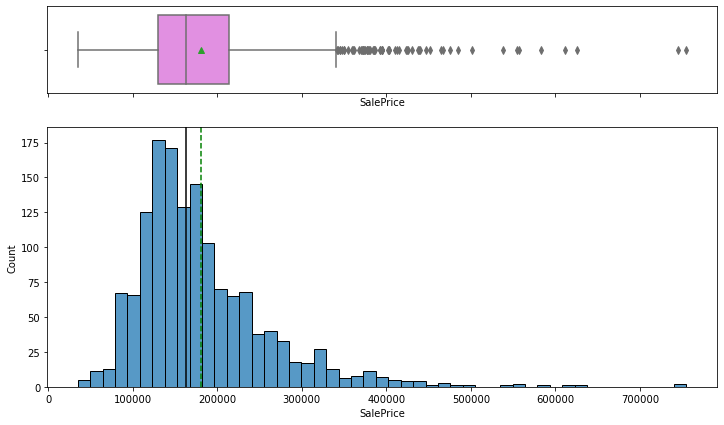

In [201]:
histogram_boxplot(df, target)

In [202]:
list = corr_columns(df, target, 0.6)
list

Correlated Columns with SalePrice:


['SalePrice',
 '1stFlrSF',
 'GrLivArea',
 'GarageCars',
 'TotBathrooms',
 'TotalArea']

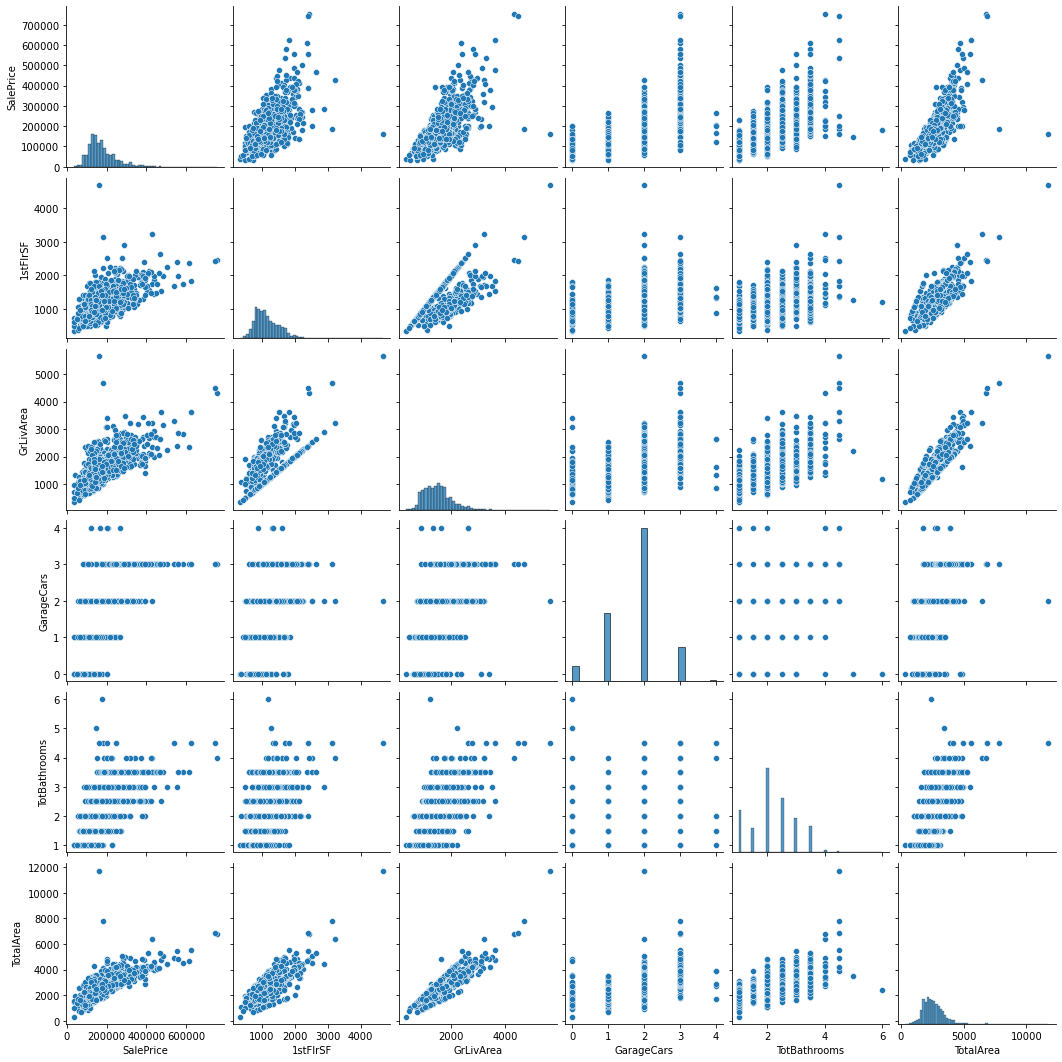

In [203]:
plt.rcParams["figure.figsize"] = (19,15)
sns.pairplot(df[list])

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

In [204]:
df = df[df.SalePrice < 700000]

In [205]:
df = df[df.TotalArea< 7500]

<AxesSubplot:xlabel='TotBathrooms', ylabel='SalePrice'>

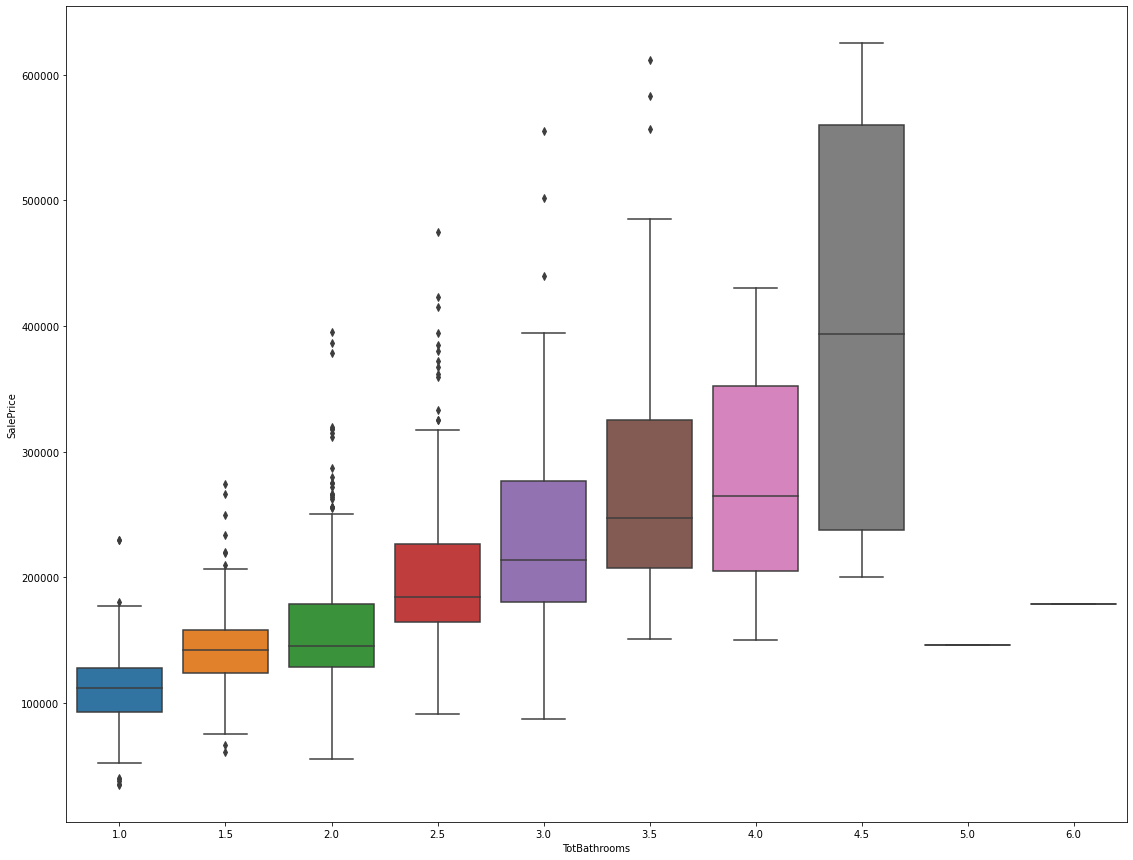

In [206]:
sns.boxplot(x='TotBathrooms', y=target, data=df)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

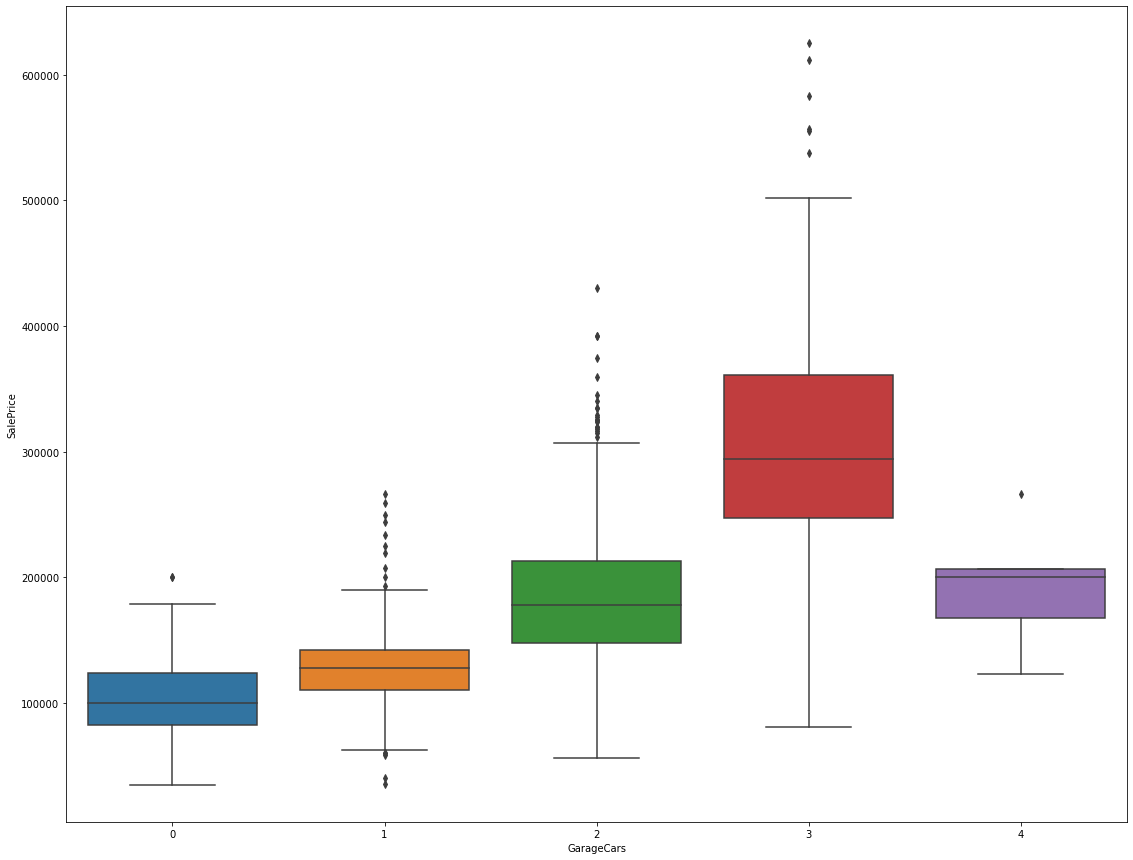

In [207]:
sns.boxplot(x='GarageCars', y=target, data=df) 

# Preprocessing Data

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
df2_dummies = pd.get_dummies(df,drop_first=True)

In [210]:
X = df2_dummies.drop(target,axis=1)
y = df2_dummies[target]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Modeling

## Linear Regression

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

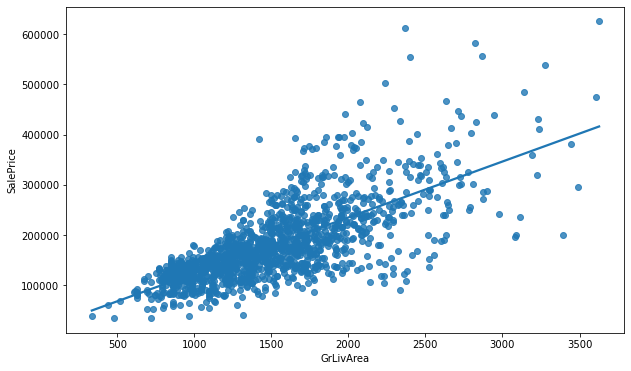

In [217]:
plt.rcParams["figure.figsize"] = (10,6)
sns.regplot(x = df.GrLivArea, y = target, data = df, ci = None);

In [214]:
lin_model = LinearRegression()

In [215]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_pred = lin_model.predict(X_test)